#Transfer Learning Resnet50 Practical.

In [12]:
!nvidia-smi

Sat Mar 11 17:48:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    29W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [13]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [14]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
ROOT_PATH = '/content/drive/MyDrive/VggNEt-20230225T072731Z-001/VggNEt'

In [17]:
!pwd

/content


In [18]:
import os
os.chdir(ROOT_PATH)
os.getcwd()

'/content/drive/MyDrive/VggNEt-20230225T072731Z-001/VggNEt'

In [19]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'flowers/train'
valid_path = 'flowers/validation'


In [20]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


94765736/94765736 [==============================] - 4s 0us/step


In [21]:
# don't train existing weights
for layer in resnet50.layers:
  print(layer)

In [22]:
# don't train existing weights
for layer in resnet50.layers:
    layer.trainable = False

In [23]:
for layer in resnet50.layers:
  print(layer.name,layer.trainable)

input_1 False
conv1_pad False
conv1_conv False
conv1_bn False
conv1_relu False
pool1_pad False
pool1_pool False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_0_bn False
conv2_block1_3_bn False
conv2_block1_add False
conv2_block1_out False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_3_bn False
conv2_block2_add False
conv2_block2_out False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
conv2_block3_3_conv False
conv2_block3_3_bn False
conv2_block3_add False
conv2_block3_out False
conv3_block1_1_conv False
conv3_block1_1_bn False
conv3_block1_1_relu False
conv3_block1_2_con

In [24]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [25]:
# useful for getting number of output classes
folders = glob('flowers/train/*')

In [26]:
folders

['flowers/train/sunflower',
 'flowers/train/rose',
 'flowers/train/tulip',
 'flowers/train/daisy',
 'flowers/train/dandelion']

In [27]:
len(folders)

5

In [28]:
model = Sequential()

model.add(resnet50)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [29]:
# view the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 49,279,365
Trainable params: 25,691,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [30]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [31]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
!pwd

/content/drive/MyDrive/VggNEt-20230225T072731Z-001/VggNEt


In [33]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('flowers/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 600 images belonging to 5 classes.


In [34]:
test_set = test_datagen.flow_from_directory('flowers/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 300 images belonging to 5 classes.


In [35]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
19/19 [==============================] - 411s 21s/step - loss: 15.2833 - accuracy: 0.1750 - val_loss: 3.3486 - val_accuracy: 0.2967
Epoch 2/10
19/19 [==============================] - 13s 708ms/step - loss: 2.5418 - accuracy: 0.2567 - val_loss: 1.9823 - val_accuracy: 0.3233
Epoch 3/10
19/19 [==============================] - 11s 566ms/step - loss: 1.9567 - accuracy: 0.3283 - val_loss: 2.4913 - val_accuracy: 0.3033
Epoch 4/10
19/19 [==============================] - 14s 734ms/step - loss: 1.8627 - accuracy: 0.3217 - val_loss: 1.6353 - val_accuracy: 0.3767
Epoch 5/10
19/19 [==============================] - 12s 644ms/step - loss: 1.8310 - accuracy: 0.3350 - val_loss: 1.7790 - val_accuracy: 0.4200
Epoch 6/10
19/19 [==============================] - 12s 619ms/step - loss: 1.5786 - accuracy: 0.3783 - val_loss: 1.5133 - val_accuracy: 0.4567
Epoch 7/10
19/19 [==============================] - 12s 614ms/step - loss: 1.3144 - accuracy: 0.4500 - val_loss: 1.6650 - val_accuracy: 0.3633

In [36]:
import matplotlib.pyplot as plt

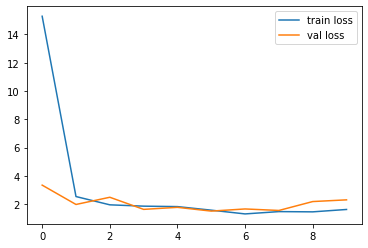

<Figure size 432x288 with 0 Axes>

In [37]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

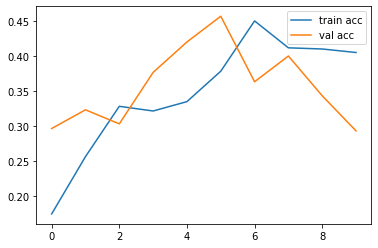

<Figure size 432x288 with 0 Axes>

In [38]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [39]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [40]:
y_pred = model.predict(test_set)

10/10 [==============================] - 3s 232ms/step


In [41]:
y_pred

array([[5.3326558e-02, 3.4237722e-01, 3.6411647e-02, 5.3900498e-01,
        2.8879665e-02],
       [7.3723012e-01, 3.7409452e-05, 1.2424725e-05, 2.6270297e-01,
        1.7079748e-05],
       [2.4693416e-02, 3.0577898e-02, 2.1761553e-03, 9.3682253e-01,
        5.7299314e-03],
       ...,
       [1.7342584e-01, 5.2459419e-02, 1.8301405e-02, 7.4782634e-01,
        7.9869945e-03],
       [1.1293676e-02, 1.9045642e-02, 4.5922808e-03, 9.6231306e-01,
        2.7552568e-03],
       [1.7630180e-02, 6.5800138e-02, 2.6662427e-01, 6.2879539e-01,
        2.1149963e-02]], dtype=float32)

In [42]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [43]:
y_pred

array([3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 0, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 0, 0, 3, 3, 3, 1, 3, 3, 0, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 0,
       3, 1, 3, 1, 3, 3, 2, 3, 3, 3, 3, 0, 3, 3, 1, 4, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 1, 3, 0, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 1, 3, 3, 3, 3])

In [44]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [45]:
model=load_model('model_resnet50.h5')

In [46]:
img=image.load_img('tulip.jpg',target_size=(224,224))

In [47]:
x=image.img_to_array(img)

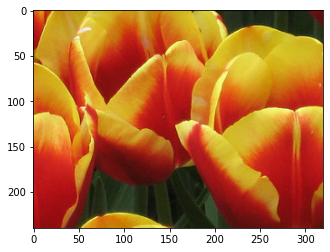

In [48]:
Z = plt.imread('tulip.jpg')
plt.imshow(Z)

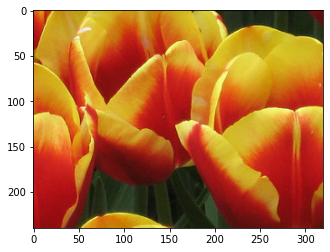

In [49]:
Z = plt.imread('tulip.jpg')
plt.imshow(Z)

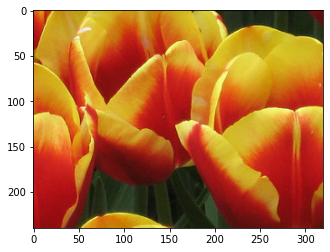

In [50]:
Z = plt.imread('tulip.jpg')
plt.imshow(Z)

In [51]:
x=x/255

In [52]:
from keras.applications.vgg16 import preprocess_input

In [53]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [54]:
model.predict(img_data)

1/1 [==============================] - 1s 1s/step


array([[5.2849334e-01, 5.2467366e-03, 4.8387409e-03, 4.6120211e-01,
        2.1908454e-04]], dtype=float32)

In [55]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 28ms/step


In [56]:
a

array([0])

In [57]:
flower_name = ['dandelion',
 'sunflower',
 'tulip',
 'daisy',
 'rose']

In [58]:
flower_name[a[0]]

'dandelion'